# New section

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#rather than defining class in different file, I found this as convenient way of using 
from gym import spaces
import numpy as np
import random
from itertools import groupby
from itertools import product



class TicTacToe():

    def __init__(self):
        """initialising the board"""
        # initialise state as an array
        self.state = [np.nan for _ in range(9)]  # initialises the board position, can initialise to an array or matrix
        # all possible numbers
        self.all_possible_numbers = [i for i in range(1, len(self.state) + 1)] # , can initialise to an array or matrix
        self.reset()


    def is_winning(self, curr_state):
        winning_pattern = [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]
        
        """Takes state as an input and returns whether any row, column or diagonal has winning sum
        Example: Input state- [1, 2, 3, 4, nan, nan, nan, nan, nan]
        Output = False"""
        """ winning_pattern = [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]"""
        
        for pattern in winning_pattern:
            if not np.isnan(curr_state[pattern[0]]) and not np.isnan(curr_state[pattern[1]]) and not np.isnan(curr_state[pattern[2]]):
                pattern_state = curr_state[pattern[0]] + curr_state[pattern[1]] + curr_state[pattern[2]]
                if pattern_state == 15:
                    return True
        return False


    def is_terminal(self, curr_state):
        # Terminal state could be winning state or when the board is filled up
        if self.is_winning(curr_state) == True:
            return True, 'Win'

        elif len(self.allowed_positions(curr_state)) ==0:
            return True, 'Tie'

        else:
            return False, 'Resume'



    def allowed_positions(self, curr_state):
        """Takes state as an input and returns all indexes that are blank"""
        return [i for i, val in enumerate(curr_state) if np.isnan(val)]


    def allowed_values(self, curr_state):
        """Takes the current state as input and returns all possible (unused) values that can be placed on the board"""
        used_values = [val for val in curr_state if not np.isnan(val)]
        agent_values = [val for val in self.all_possible_numbers if val not in used_values and val % 2 !=0]
        env_values = [val for val in self.all_possible_numbers if val not in used_values and val % 2 ==0]
        return (agent_values, env_values)


    def action_space(self, curr_state):
        """Takes the current state as input and returns all possible actions, i.e, all combinations of allowed positions and allowed values"""

        agent_actions = product(self.allowed_positions(curr_state), self.allowed_values(curr_state)[0])
        env_actions = product(self.allowed_positions(curr_state), self.allowed_values(curr_state)[1])
        return (agent_actions, env_actions)




    def state_transition(self, curr_state, curr_action):
        
        """Takes current state and action and returns the board position just after agent's move.
        Example: Input state- [1, 2, 3, 4, nan, nan, nan, nan, nan], action- [7, 9] or [position, value]
        Output = [1, 2, 3, 4, nan, nan, nan, 9, nan]
        """
        
        curr_state[curr_action[0]] = curr_action[1]
        return curr_state


    def step(self, curr_state, curr_action):
        
        
        """Takes current state and action and returns the next state, reward and whether the state is terminal. Hint: First, check the board position after
        agent's move, whether the game is won/loss/tied. Then incorporate environment's move and again check the board status.
        Example: Input state- [1, 2, 3, 4, nan, nan, nan, nan, nan], action- [7, 9] or [position, value]
        Output = ([1, 2, 3, 4, nan, nan, nan, 9, nan], -1, False)"""
        final_state = False
        intermediate_state = self.state_transition(curr_state, curr_action)
        final_state, game_status = self.is_terminal(intermediate_state)
        if final_state == True:
            if game_status == 'Win':
                reward=10
            else:
                reward=0
        else:
            pos = random.choice(self.allowed_positions(intermediate_state))
            val = random.choice(self.allowed_values(intermediate_state)[1])
            intermediate_state[pos]= val
            final_state, game_status = self.is_terminal(intermediate_state)
            if final_state == True:
                if game_status == 'Win':
                    reward=-10
                else:
                    reward=0
            else:
                reward=-1
        return intermediate_state, reward, final_state

    def reset(self):
        return self.state

In [61]:
##from TCGame_Env.py import TicTacToe
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
## defining object for the Tictac toe environment created as MDP in TCGame_env
env = TicTacToe()

In [62]:
def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [63]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

In [64]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [65]:
# printing the default tic tac toe board positions
Q_state(env.state)


'x-x-x-x-x-x-x-x-x'

In [66]:
# Printing all the valid actions
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

In [67]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action

In [68]:
# Initialising Q_dictionary and States_track
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)


In [69]:
# Initialising states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-3-x-x-1-x-x-x-x',(7,5)),('x-5-x-x-x-x-5-7-x',(8,2))]    #select some 4 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [70]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [71]:
# definign a function for saving states tracking

def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action]) 

Define hyperparameters



In [72]:
#Defining parameters for the training

EPISODES = 50000
LR = 0.01                   # learning rate
GAMMA = 0.9                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001        # epsilon decay rate
threshold = 200       # no of episodes after which states_tracked wwill be saved
policy_threshold = 300   # no of episodes after which Q dictionary/table will be saved

In [73]:
initialise_tracking_states()

Build an agent that learns the game by Q-Learning



In [74]:
import time 
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    
    env = TicTacToe() # call the environment
    curr_state = env.state    
    done = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while done != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon-greedy policy method
        next_state, reward, done = env.step(curr_state, curr_action) # getting next_state, reward, terminal flag
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)


        # Updating rules
        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')
        print(episode)     ## Tracking episode at step increment of threshold value

    if ((episode+1)% policy_threshold) == 0:  # Every 10000 episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict') 
    
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   #States_tracked in 'States_tracked' file
save_obj(Q_dict,'Policy')                 #Q_table saved in 'Policy' file

199
399
599
799
999
1199
1399
1599
1799
1999
2199
2399
2599
2799
2999
3199
3399
3599
3799
3999
4199
4399
4599
4799
4999
5199
5399
5599
5799
5999
6199
6399
6599
6799
6999
7199
7399
7599
7799
7999
8199
8399
8599
8799
8999
9199
9399
9599
9799
9999
10199
10399
10599
10799
10999
11199
11399
11599
11799
11999
12199
12399
12599
12799
12999
13199
13399
13599
13799
13999
14199
14399
14599
14799
14999
15199
15399
15599
15799
15999
16199
16399
16599
16799
16999
17199
17399
17599
17799
17999
18199
18399
18599
18799
18999
19199
19399
19599
19799
19999
20199
20399
20599
20799
20999
21199
21399
21599
21799
21999
22199
22399
22599
22799
22999
23199
23399
23599
23799
23999
24199
24399
24599
24799
24999
25199
25399
25599
25799
25999
26199
26399
26599
26799
26999
27199
27399
27599
27799
27999
28199
28399
28599
28799
28999
29199
29399
29599
29799
29999
30199
30399
30599
30799
30999
31199
31399
31599
31799
31999
32199
32399
32599
32799
32999
33199
33399
33599
33799
33999
34199
34399
34599
34799
34999
35199

In [75]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.00668926566807,
              (0, 3): -1.0067009921016876,
              (0, 5): -1.0066815657050607,
              (0, 7): -1.0066935204540657,
              (0, 9): -1.0066967578747923,
              (1, 1): -1.006683789133231,
              (1, 3): -1.0066914840584251,
              (1, 5): -1.0066983777447867,
              (1, 7): -1.0066992743038452,
              (1, 9): -1.0066959158326088,
              (2, 1): -1.0066840496947218,
              (2, 3): -1.0067022966988395,
              (2, 5): -1.0066851762606643,
              (2, 7): -1.006688335448901,
              (2, 9): -1.0066884771256153,
              (3, 1): -1.0066838053036649,
              (3, 3): -1.0066835513233348,
              (3, 5): -1.0066977707976188,
              (3, 7): -1.0066895922482169,
              (3, 9): -1.0066804547682398,
              (4, 1): -1.0066858688108697,
              (4, 3): -1.0066978712229357,
              (4, 5

Checking whether Q-values learnt by the agent have converged or not

<function matplotlib.pyplot.show>

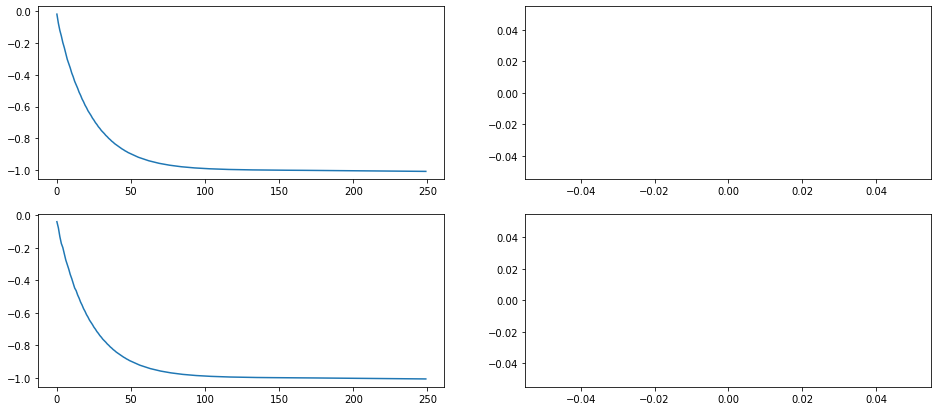

In [76]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-1-x-x-x-x'][(7,5)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-1-x-x-x-x'][(7,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-5-x-x-x-x-5-7-x'][(8,2)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-5-x-x-x-x-5-7-x'][(8,2)]))
plt.show

Epsilon - decay check

In [77]:
time = np.arange(0,50000)
epsilon = []
for i in range(0,50000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

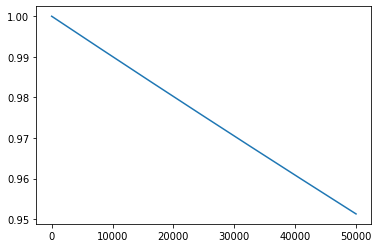

In [78]:
plt.plot(time, epsilon)
plt.show()
